<a href="https://colab.research.google.com/github/omertascioglu/YOLOv8-ShoeSoles-Detector/blob/main/ShoeSoles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob

In [ ]:
from IPython.display import Image, display

In [ ]:
from IPython import display

In [ ]:
display.clear_output()

In [ ]:
!nvidia-smi

Mon Jul 24 07:38:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
HOME = os.getcwd()

In [ ]:
print(HOME)

/content


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.6/607.6 kB 4.8 MB/s eta 0:00:00


In [ ]:
import ultralytics

In [ ]:
ultralytics.checks()

Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.3/78.2 GB disk)


In [ ]:
!mkdir {HOME}/datasets

In [ ]:
!pwd

/content


In [ ]:
%cd {HOME}/datasets

/content/datasets


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="M7UmyY4VX7QywIUADwea")
project = rf.workspace("yolov8-hlm3z").project("detectingshoesolesyolov8")
dataset = project.version(1).download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.3 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=1b8f5a9e6a7c09c9832820bdddaf7652d413ac78c36c4eacd465ec0a3cb13091
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0
  Attempting uninstall: idna
    Found e

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to DetectingShoeSolesYOLOV8-1 in yolov5pytorch:: 100%|██████████| 624/624 [00:00<00:00, 1241.24it/s]


In [ ]:
%cd {HOME}

/content


In [ ]:
%cd {dataset.location}

/content/datasets/DetectingShoeSolesYOLOV8-1


In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8m.pt data=/content/datasets/DetectingShoeSolesYOLOV8/data.yaml epochs=70 imgsz=640

/content
Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/DetectingShoeSolesYOLOV8/data.yaml, epochs=70, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optim

In [ ]:
!ls {HOME}//runs/detect/train2

args.yaml					    train_batch0.jpg
confusion_matrix_normalized.png			    train_batch1.jpg
confusion_matrix.png				    train_batch2.jpg
events.out.tfevents.1690184458.7bbefb824112.1263.0  train_batch840.jpg
F1_curve.png					    train_batch841.jpg
labels_correlogram.jpg				    train_batch842.jpg
labels.jpg					    val_batch0_labels.jpg
P_curve.png					    val_batch0_pred.jpg
PR_curve.png					    val_batch1_labels.jpg
R_curve.png					    val_batch1_pred.jpg
results.csv					    weights
results.png


/content


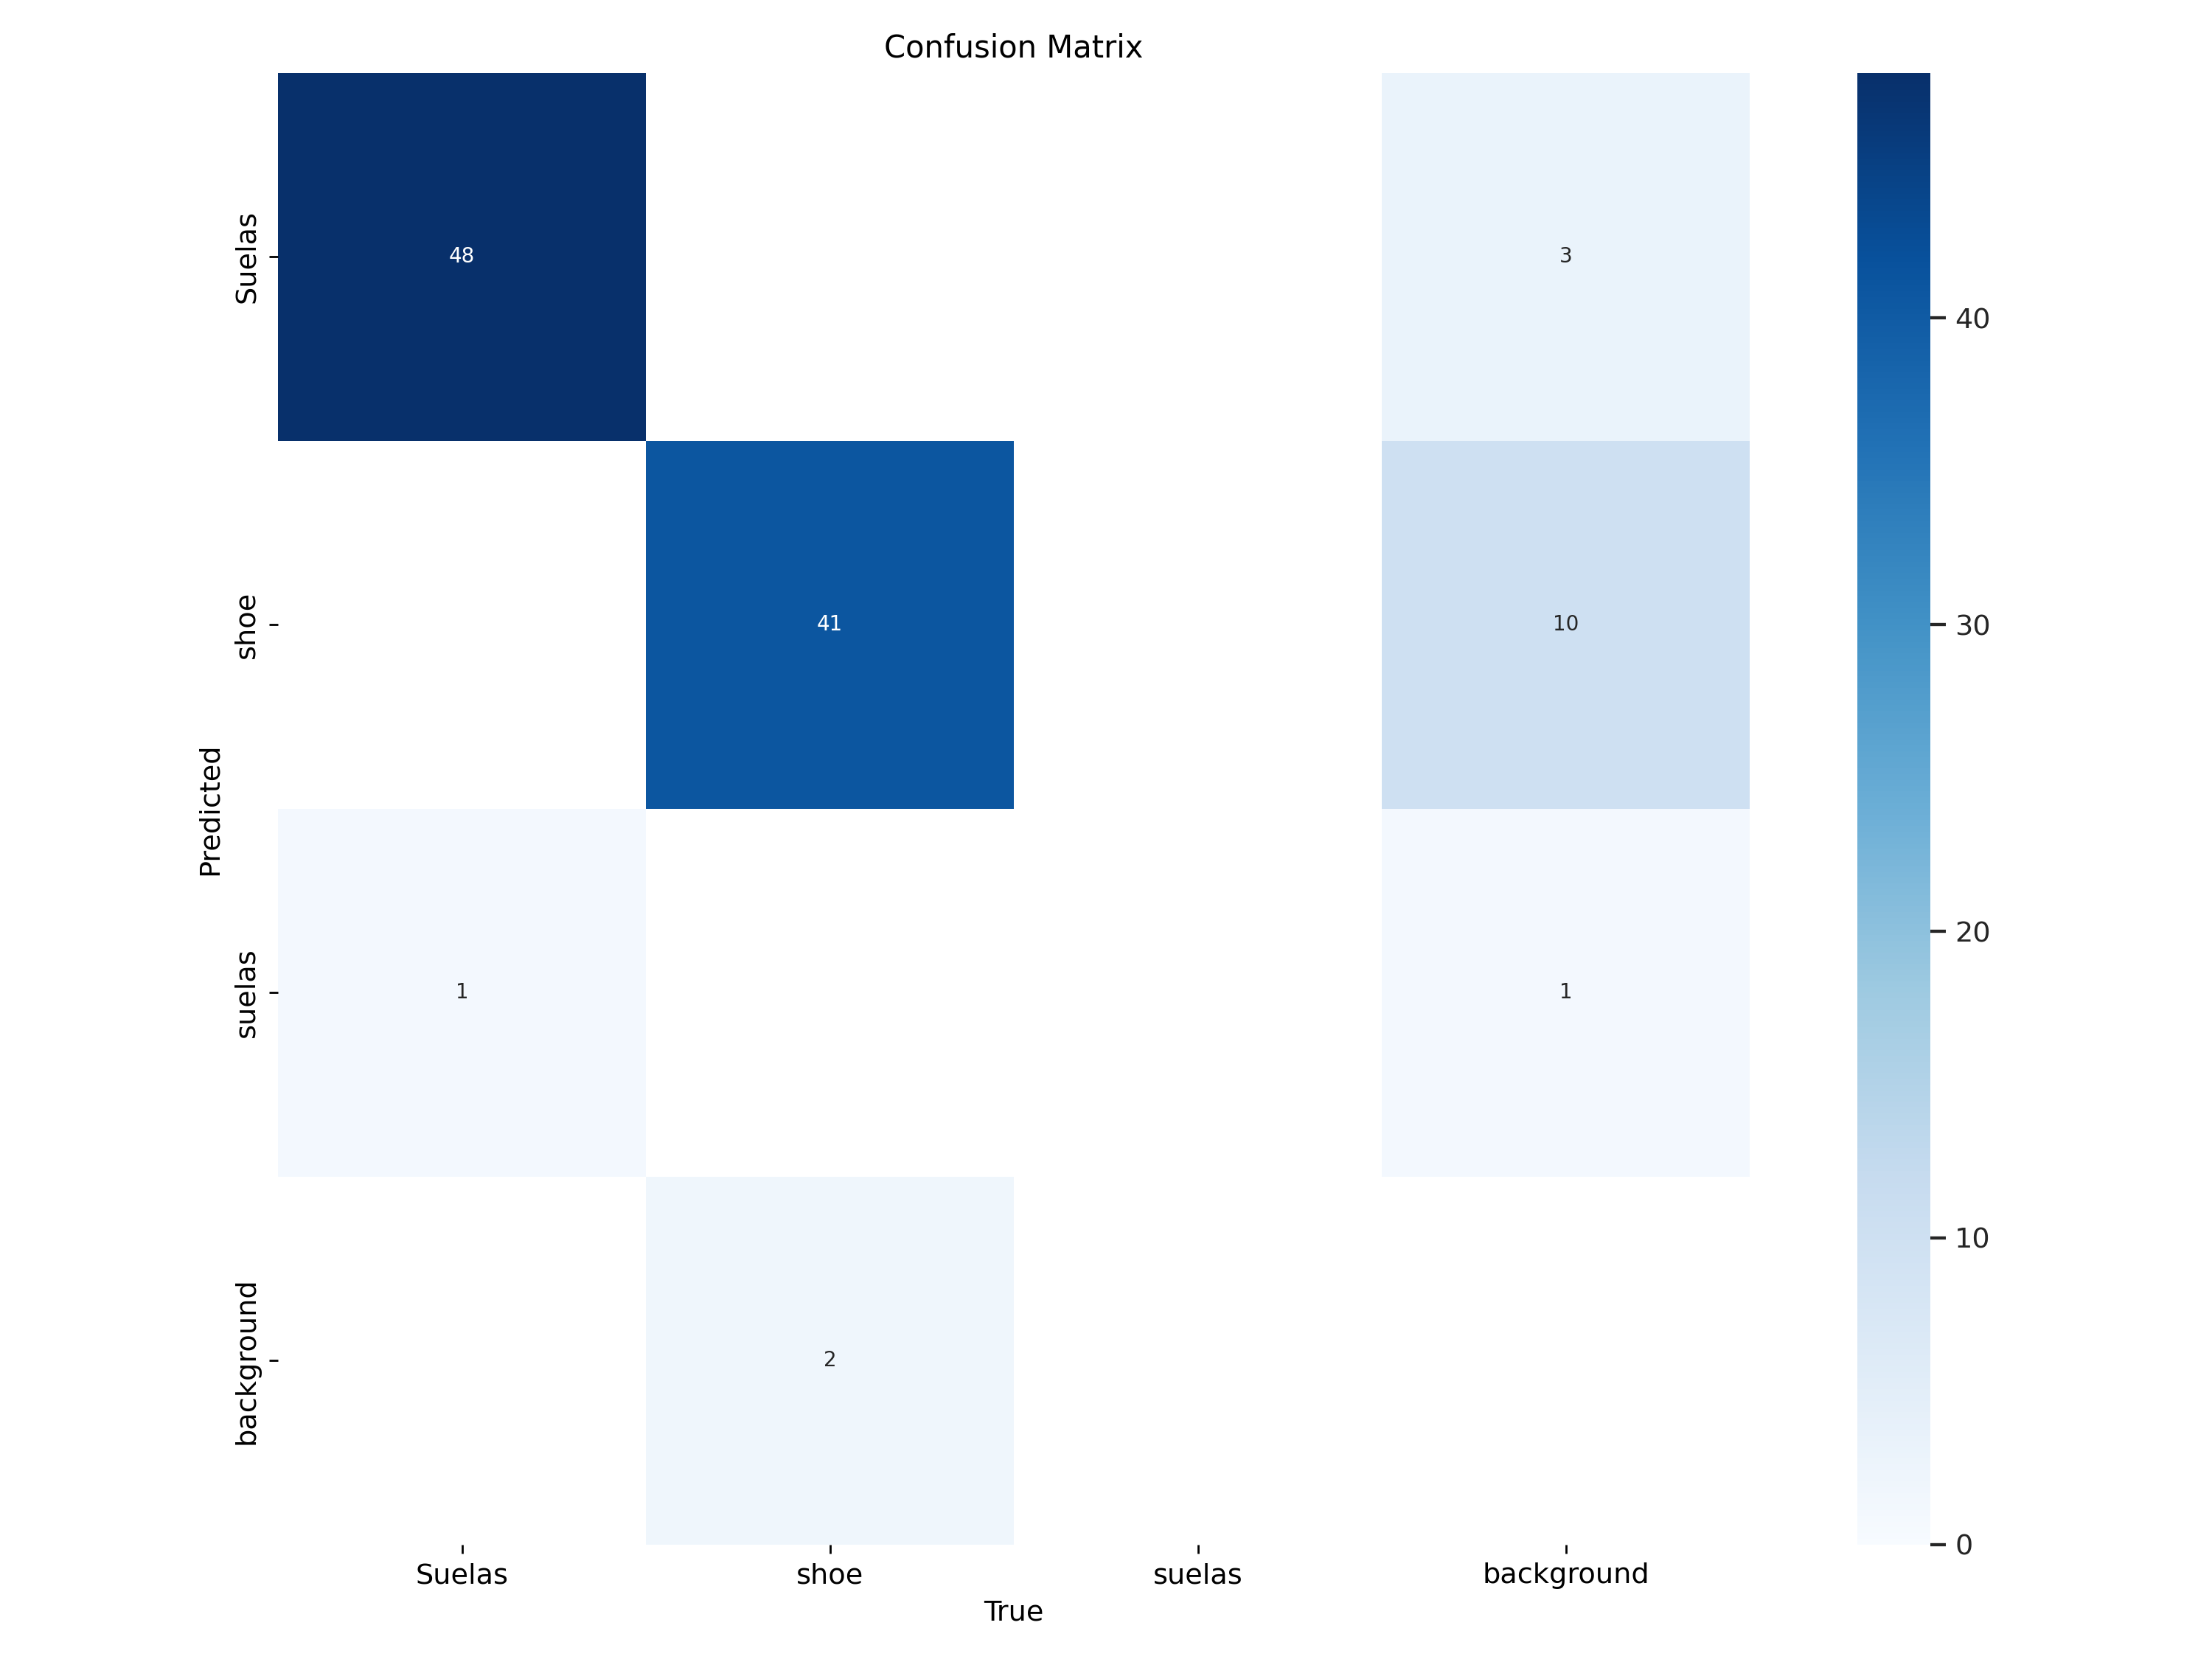

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=900)

/content


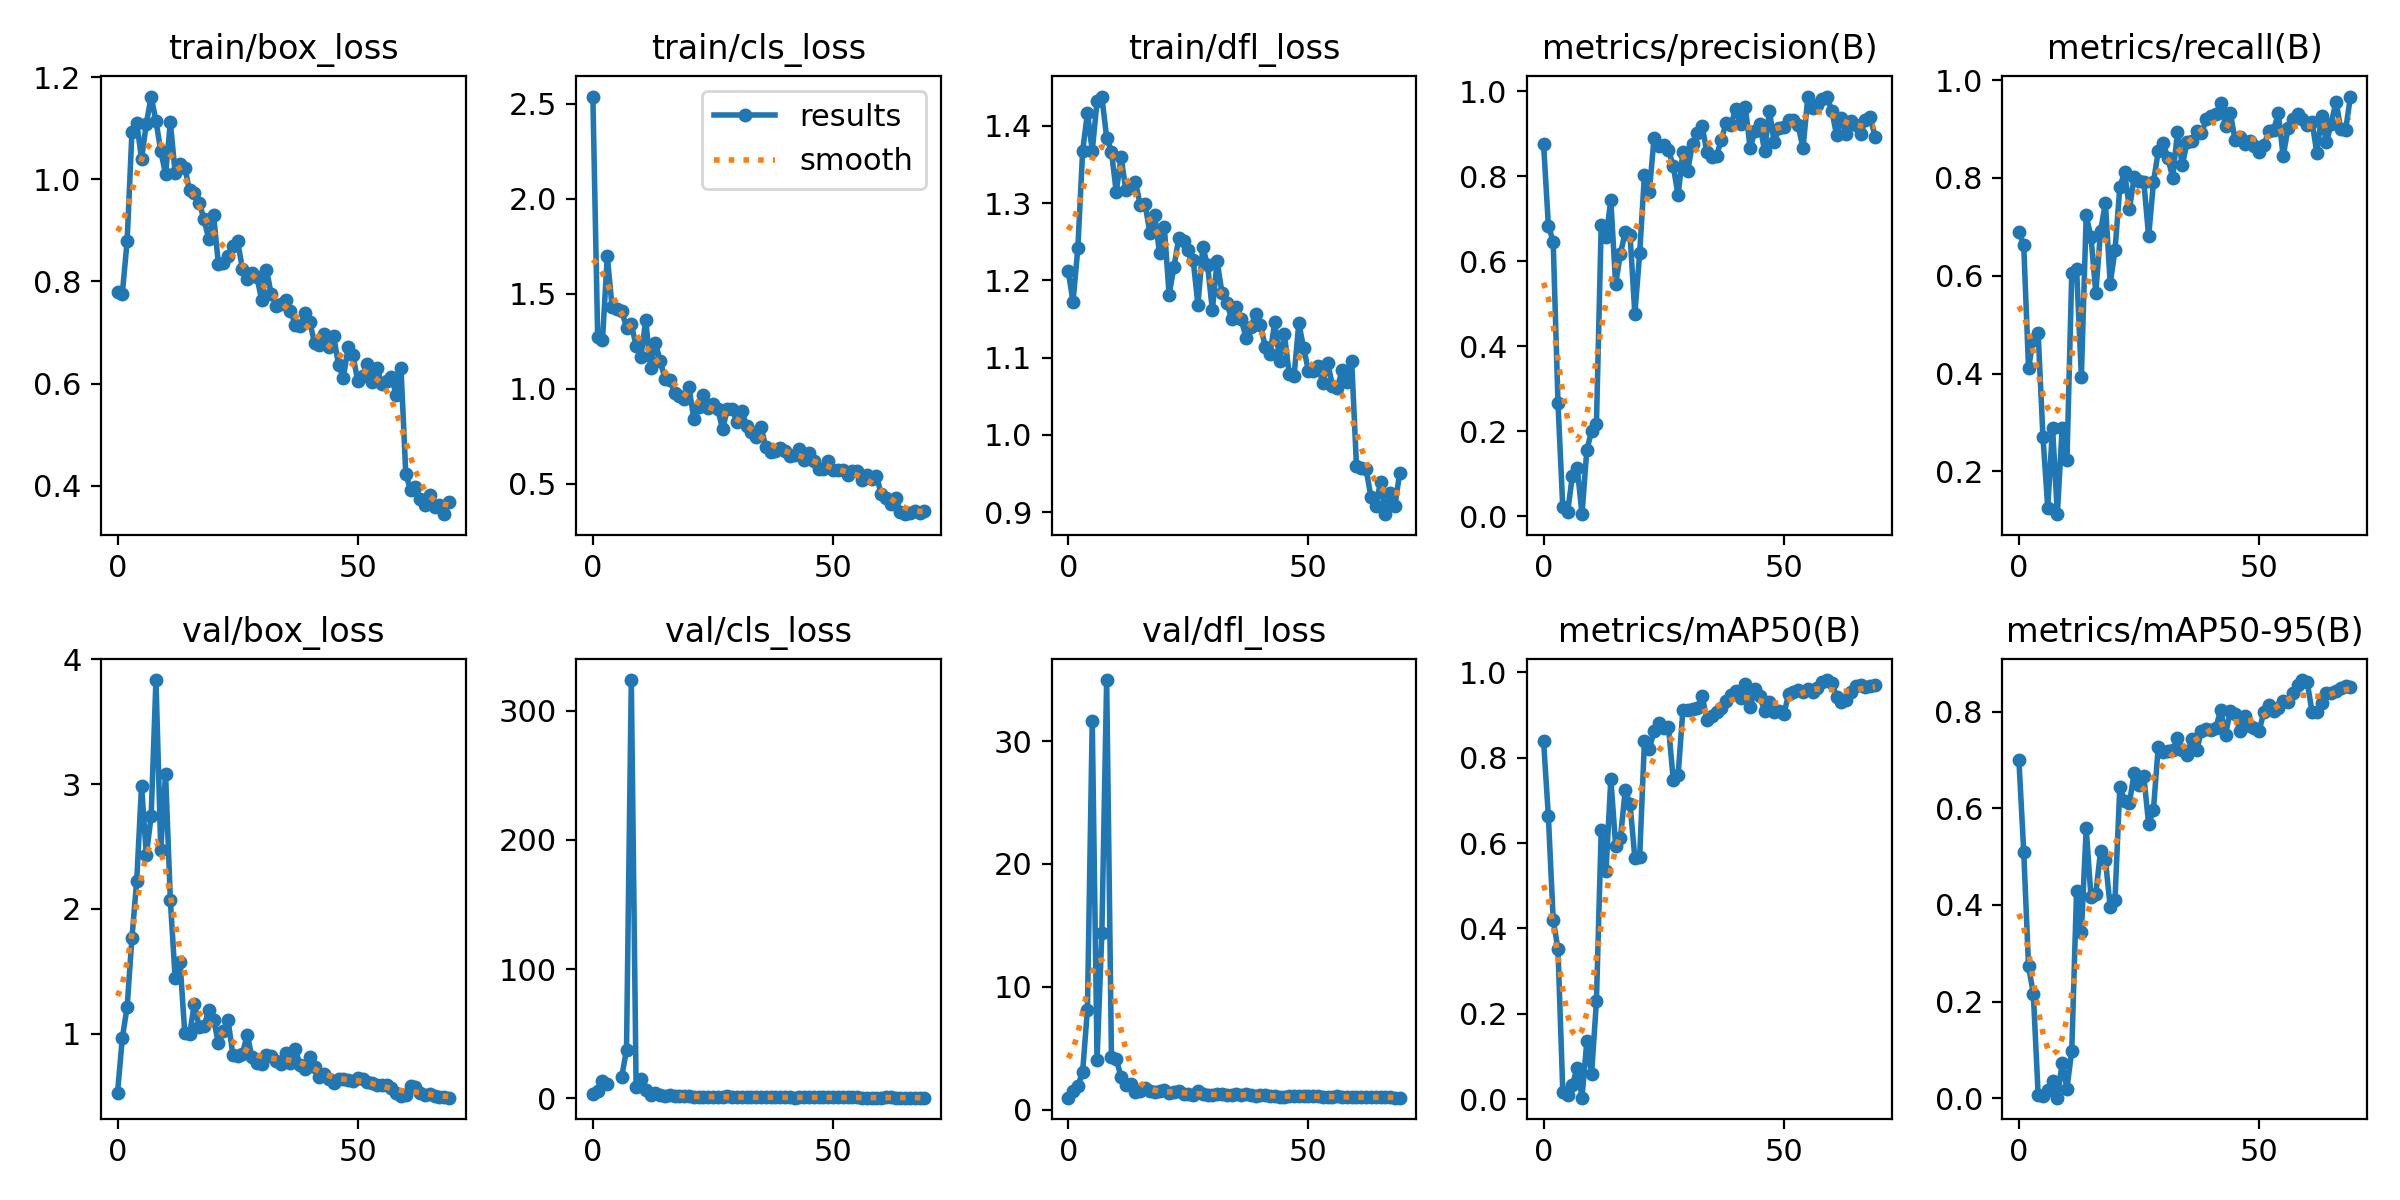

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


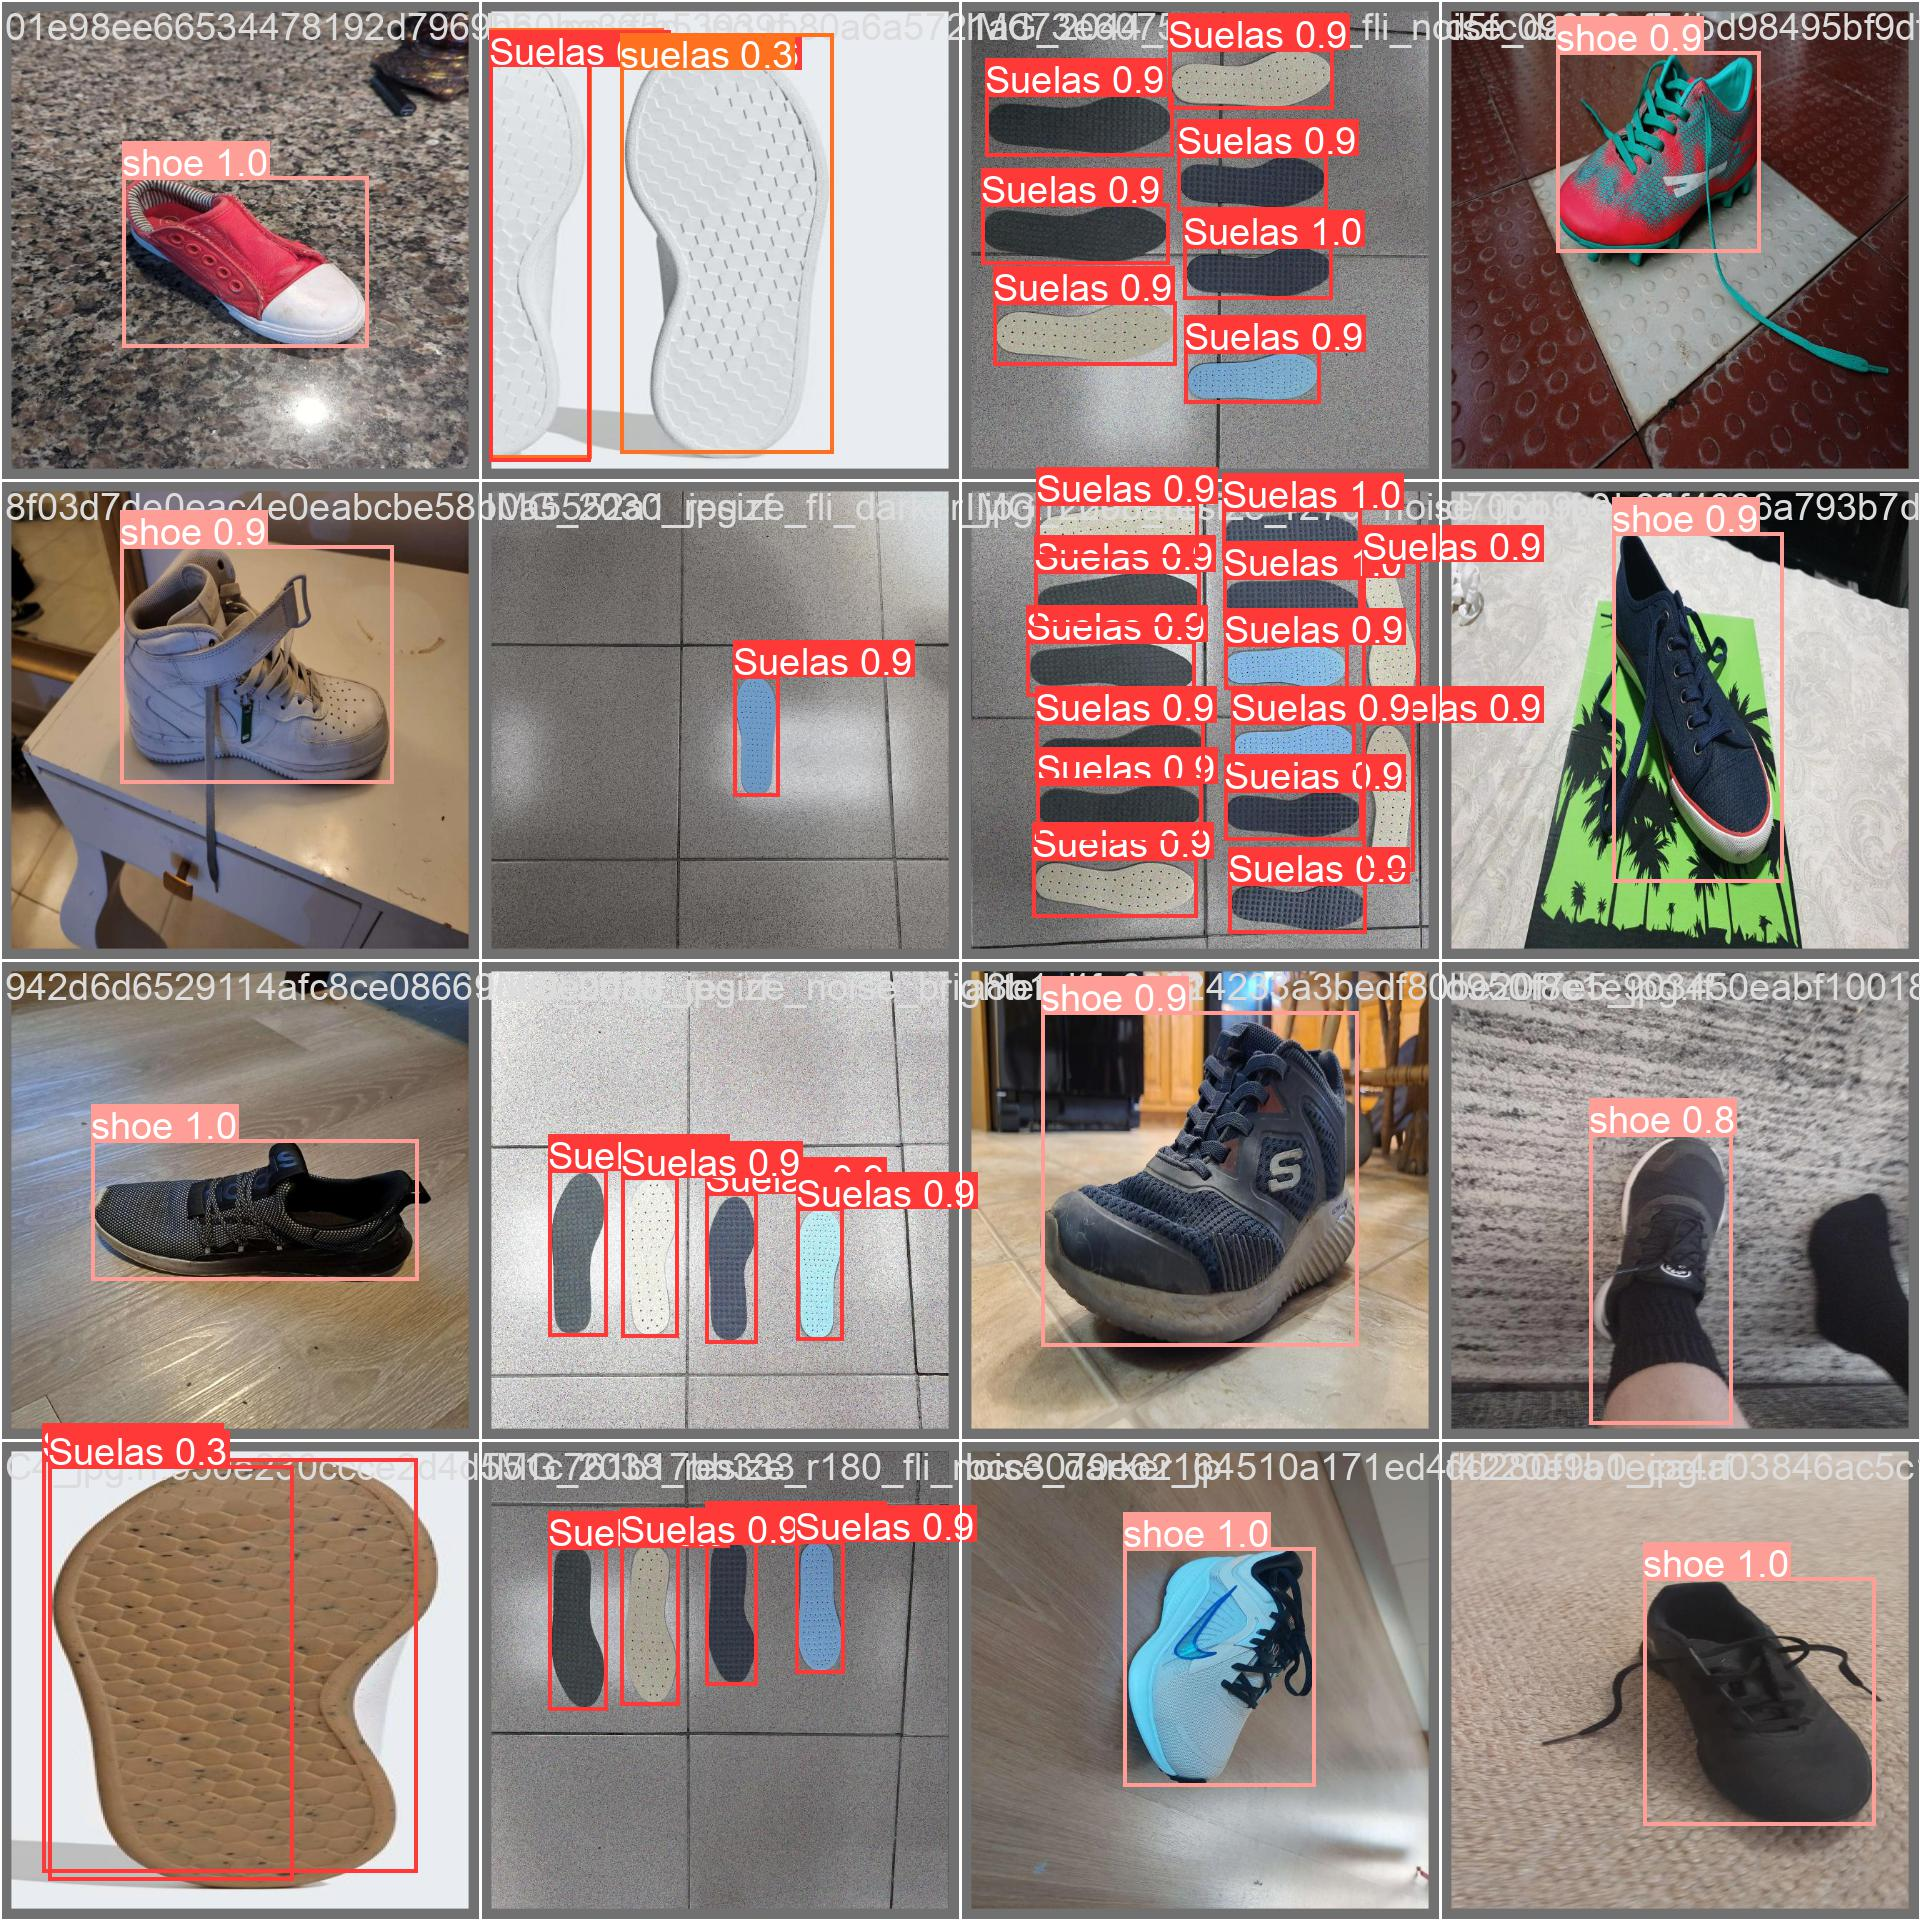

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data=/content/datasets/DetectingShoeSolesYOLOV8/data.yaml

/content
Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients
val: Scanning /content/datasets/DetectingShoeSolesYOLOV8/valid/labels.cache... 54 images, 0 backgrounds, 0 corrupt: 100% 54/54 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:04<00:00,  1.03s/it]
                   all         54         92      0.988       0.92      0.981      0.866
                Suelas         54         49          1      0.913      0.993        0.9
                  shoe         54         43      0.976      0.927      0.969      0.833
Speed: 10.0ms preprocess, 31.8ms inference, 0.0ms loss, 7.9ms postprocess per image
Results saved to runs/detect/val


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source=/content/datasets/DetectingShoeSolesYOLOV8/test/images

/content
Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients

image 1/35 /content/datasets/DetectingShoeSolesYOLOV8/test/images/0d6450f1f2124f0abf5fe550af7b3c29_jpg.rf.6ff1ff03cba5f038a3b06e25d0652055.jpg: 640x640 1 shoe, 40.7ms
image 2/35 /content/datasets/DetectingShoeSolesYOLOV8/test/images/0e38affbf37448608c2672a7b2db51eb_jpg.rf.7abe84682e8364ddff09833fcbe61f91.jpg: 640x640 2 shoes, 37.1ms
image 3/35 /content/datasets/DetectingShoeSolesYOLOV8/test/images/22618d2e8e2247c58ec8d0a5781a59e0_jpg.rf.4e0db4a62ba9c28a2e9ef7aecab83ac8.jpg: 640x640 1 shoe, 36.9ms
image 4/35 /content/datasets/DetectingShoeSolesYOLOV8/test/images/2f1caf98826f452f86867d27750670ae_jpg.rf.bbe85d52714e785ec8fa2dae9c9cdf38.jpg: 640x640 1 shoe, 36.9ms
image 5/35 /content/datasets/DetectingShoeSolesYOLOV8/test/images/3cf359a05fb04fad8af9dbd1da311982_jpg.rf.80b8f6e93dd4442bbe9d784c0da459e7.jpg: 640x640 2 shoes, 37.0m